In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.chdir('C:/Users/Witsan/WitsanFolder/Data/House_Prices/')
data_train = pd.read_csv('train.csv',engine = 'python')
data_test = pd.read_csv('test.csv',engine = 'python')
train_id = data_train['Id']
test_id = data_test['Id']
data_train = data_train.drop(['Id'],axis = 1)
data_test = data_test.drop(['Id'], axis = 1)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#### 异常点处理

1458

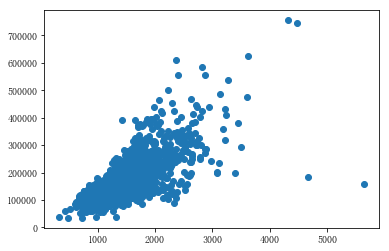

In [4]:
# remove large area and low price house
plt.scatter(data_train['GrLivArea'],data_train['SalePrice'])
abnormal_value = data_train[(data_train['GrLivArea']>4000) & (data_train['SalePrice'] <300000)].index
data_train = data_train.drop(abnormal_value,axis = 0)
len(data_train)

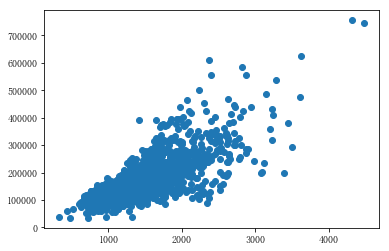

In [5]:
#check
plt.scatter(data_train['GrLivArea'],data_train['SalePrice'])

In [6]:
### # 大部分的统计原理和参数检验都是基于正态分布推得的，线性回归模型也建立在之上，所以要通过变换使其近似为正态分布

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.259599766243, 180932.91906721535, 0.93201544928923674))

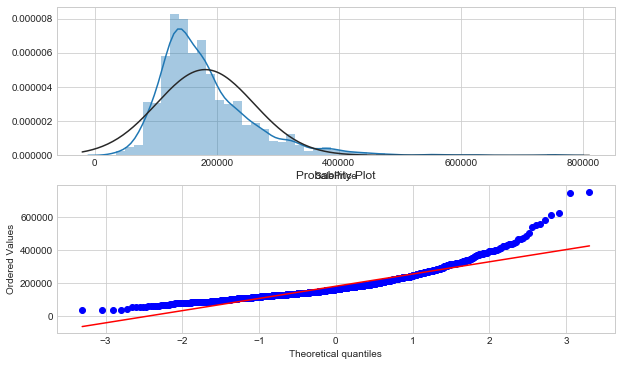

In [7]:
from scipy import stats
from scipy.stats import norm
sns.set_style('whitegrid')

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
sns.distplot(data_train['SalePrice'],fit=norm,kde = True)
ax2 = fig.add_subplot(2,1,2)
stats.probplot(data_train['SalePrice'],dist = norm,plot = plt)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 10.46027076,  10.47197813,  10.54273278, ...,  13.34550853,
          13.52114084,  13.53447435])),
 (0.39852948329807308, 12.024015155682548, 0.99539187214170832))

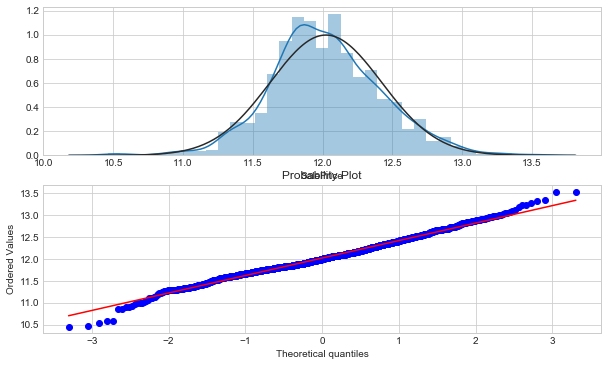

In [8]:
data_train['SalePrice'] = np.log1p(data_train['SalePrice'])
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
sns.distplot(data_train['SalePrice'],fit=norm,kde = True)
ax2 = fig.add_subplot(2,1,2)
stats.probplot(data_train['SalePrice'],dist = norm,plot = plt)

In [9]:
### 处理缺失值

In [10]:
data_train_null = pd.DataFrame(data_train.isnull().sum().sort_values(ascending = False)).reset_index()
data_train_null.columns = ['Feature','Missing_num']
data_train_null['ratio'] = data_train_null['Missing_num']/len(data_train)
data_train_null[data_train_null['Missing_num']>0]

,Feature,Missing_num,ratio
0,PoolQC,1452,0.995885
1,MiscFeature,1404,0.962963
2,Alley,1367,0.937586
3,Fence,1177,0.807270
4,FireplaceQu,690,0.473251
5,LotFrontage,259,0.177641
6,GarageType,81,0.055556
7,GarageCond,81,0.055556
8,GarageFinish,81,0.055556
9,GarageQual,81,0.055556


In [11]:
### 先删除缺失值占15%的信息，车库四个字段都是缺失81个，我们查看一下这个四个字段缺失的是不是同样的样本
# garage_info = data_train[['GarageType','GarageCond','GarageFinish','GarageFinish']]
# len(garage_info[garage_info.isnull().any(axis = 1)])

In [12]:
data_train_len = len(data_train)
data_test_len = len(data_test)
data = pd.concat([data_train.drop(['SalePrice'],axis = 1),data_test],axis = 0).reset_index(drop = True)
all_data_null = pd.DataFrame(data.isnull().sum().sort_values(ascending = False)).reset_index()
all_data_null.columns = ['Feature','Missing_num']
all_data_null['ratio'] = all_data_null['Missing_num']/len(data)
all_data_null[all_data_null['Missing_num']>0]

,Feature,Missing_num,ratio
0,PoolQC,2908,0.996915
1,MiscFeature,2812,0.964004
2,Alley,2719,0.932122
3,Fence,2346,0.804251
4,FireplaceQu,1420,0.486802
5,LotFrontage,486,0.166610
6,GarageCond,159,0.054508
7,GarageQual,159,0.054508
8,GarageYrBlt,159,0.054508
9,GarageFinish,159,0.054508


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

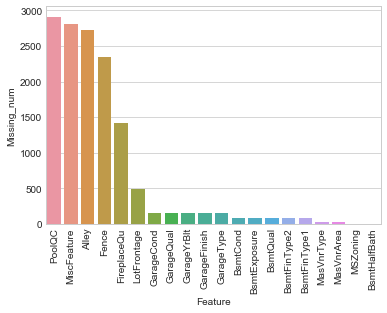

In [13]:
sns.barplot(x = all_data_null[:20]['Feature'],y = all_data_null[:20]['Missing_num'])
plt.xticks(rotation = 90)

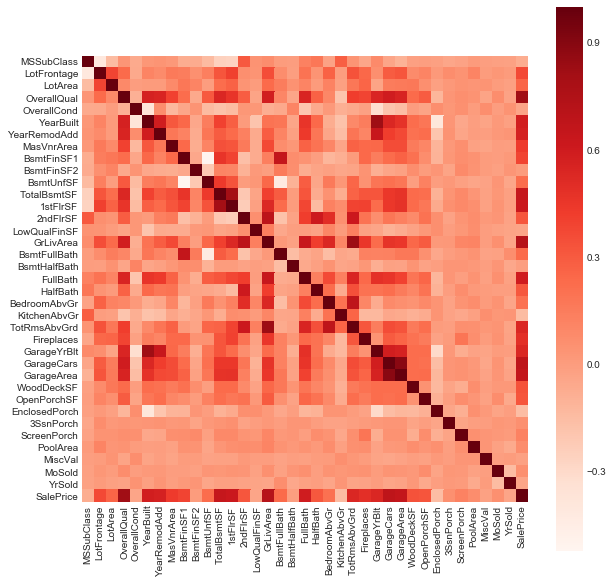

In [14]:
plt.subplots(figsize = (10,10))
sns.heatmap(data_train.corr(),cmap = 'Reds',square=True)

In [15]:
data['PoolQC'] = data['PoolQC'].fillna('None')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
data['GarageType'] = data['GarageType'].fillna('None')
data['GarageFinish'] = data['GarageFinish'].fillna('None')
data['GarageQual'] = data['GarageQual'].fillna('None')
data['GarageCond'] = data['GarageCond'].fillna('None')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)
data['GarageCars'] = data['GarageCars'].fillna(0)
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)

data['BsmtQual'] = data['BsmtQual'].fillna('None')
data['BsmtCond'] = data['BsmtCond'].fillna('None')
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data = data.drop(['Utilities'],axis = 1)
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])


In [16]:
all_data_null = pd.DataFrame(data.isnull().sum().sort_values(ascending = False)).reset_index()
all_data_null.columns = ['Feature','Missing_num']
all_data_null['ratio'] = all_data_null['Missing_num']/len(data)
all_data_null[all_data_null['Missing_num']>0]

,Feature,Missing_num,ratio


In [17]:
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].apply(str)
data['MoSold'] = data['MoSold'].apply(str)
data['YrSold'] = data['YrSold'].apply(str)

In [18]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for col in cols:
    le = LabelEncoder()
    le.fit(list(data[col].values))
    data[col] = le.transform(list(data[col].values))
data.head()
data.shape

(2917, 78)

In [19]:
num_feats = data.dtypes[data.dtypes != 'object'].index
skew_feats = data[num_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew':skew_feats})
skewness

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [20]:
skewness = skewness[abs(skewness) > 0.75]
skewness.shape[0]

58

In [21]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data[feat] = boxcox1p(data[feat], lam)

In [22]:
data = pd.get_dummies(data)

In [23]:
train = data[:data_train_len]
test = data[data_train_len:]

In [24]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(train,data_train['SalePrice'])
# y_predict = lin_reg.predict(test)

# df_y = pd.DataFrame()
# df_y['Id'] = test_id
# df_y['SalePrice'] = y_predict
# df_y.to_csv('house_price.csv',index = False)

In [27]:
# from sklearn.tree import DecisionTreeRegressor
# dt_rg = DecisionTreeRegressor()
# dt_rg.fit(train,data_train['SalePrice'])
# y_predict = dt_rg.predict(test)

# df_y = pd.DataFrame()
# df_y['Id'] = test_id
# df_y['SalePrice'] = y_predict
# df_y.to_csv('house_price.csv',index = False)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_rg = RandomForestRegressor(n_estimators=400)
rf_rg.fit(train,data_train['SalePrice'])
y_predict = rf_rg.predict(test)

df_y = pd.DataFrame()
df_y['Id'] = test_id
df_y['SalePrice'] = y_predict
df_y.to_csv('house_price_rfr.csv',index = False)